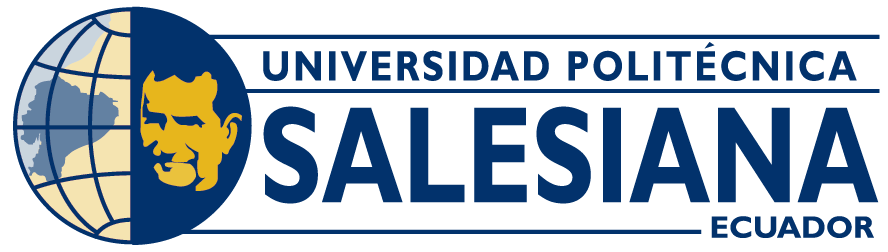

### Desarrollado por: Pablo Loja, Robbyn Reyes

## Trabajo de Investigacion

#### Analisis de variables

El dataset original cuenta con 150 parametros de los cuales se han eliminado 19 de ellos, puesto que no representaban una relevancia mayor con respecto al estudio o, los datos no eran usados en la pagina de donde proviene el dataset. Estos atributos son: id, sub_id, paper title, journal, author, source, date added, languaje, peer-reviewed, study type, subgroup, mean age, age sd, age lq, age uq, study start date, study end date, sudy length y province.
Se tiene una variable categorica nominal, la cual es country.
Se definieron que 9 de los atributos son categoricos ordinales, los cuales fueron definidos de la siguiente manera:

Overall study population or subgroup? ->

        vacio=0
		subgroup=1
		top-level=2
	

Positive/negative cases ->

		negative only=1
		posityve an negative=2
		positive=3
		positive only=4
		vacio=0

	
End-point vs Active -> 

        end-point only =end-point-only = 1
		end-pint=2
		endo-point and active=3
		active=4
		active only=5
		vacio=0
	

Survivors ->

	 	Survivors-only=1
		Both=2
		non-Non-survivors only=3
		vacio=0
	

Discharger ->

 		Discharged only=1
		Yes=2
		Both=3
		No=4
		Non-discharger only=5
		vacio=0
	

Contains Any Treatment? ->

		Yes=1
		No=2
		vacio=0
	

ICU vs. non-ICU (unidad de cuidados intensivos) ->

		Non-ICU only=1
		Both=2
		ÎÎ‘=Si=3
		ICU only=4
		vacio=0
	

Severity - >

		Asymptomatic only=1
		Mild only=2
		Mild=3
		Both=4
		All=5
		Severe=6
		Severe/Critical only=7
		vacio=0
	

Ventilation ->

		Non-ventilation only=1
		No=2
		Both=3
		ÎÎ‘=Yes=4
		Ventilation only=5
		vacio=0
                   

Las demas variables se tomaron como numericas, exceptuando los valores que representan porcentaje, donde se dividio para 100 para considerarlos como valores numericos.

Repositorio del trabajo en GitHub: 
 * Usuario: Robbyn07
 * URL: https://github.com/Robbyn07/Covid19_Analisis-Regresion-Multilineal

#### 3.2	Seleccionar y cargar un dataset

In [55]:
import pandas as pd  
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

dataset = pd.read_csv('3.COVID19_analytics_clinical_data.csv',";")  
dataset.head()

,Country,Overallstudypopulationorsubgroup?,Positive/negativecases,End-pointvsActive,Survivors,Discharged,ContainsAnyTreatment?,ICUvs.non-ICU,Severity,Ventilation,...,Hypoproteinaemia,Acidosis,Hospitaladmission(),ICUadmission,Discharged(),ICUlengthofstay.days,Hospitallengthofstay.days,DaystoViralClearance(Median),Mortality,ProjectedMortality(accountingforpatientsnotcurrentlydischarged)
0,China,2,4,1,2,3,1,2,5,3,...,0.1152,0.0890,1.0,0.26,0.72,8,11,20.0,0.28,0.28
1,China,1,4,1,3,1,1,2,7,3,...,0.3704,0.2963,1.0,0.72,0,8,7.5,7.5,1,1
2,China,1,4,1,1,1,1,2,5,3,...,0.0146,0.0073,1.0,0.08,1,7,12,20.0,0,0
3,China,2,4,3,2,3,1,2,5,3,...,NaN,NaN,1.0,NaN,0.72,10,15,28.0,0.16,0.18
4,China,1,4,3,2,3,1,2,5,3,...,NaN,NaN,1.0,NaN,0.75,6,14,28.0,0.15,0.17


#### 3.3	Desarrollar procesamiento de datos: limpiar ruido, transformar variables categóricas en numéricas, transformación de datos numéricos (estandarización, normalización MinMax, L1, L2, Scaling)

In [56]:
dataset = dataset.fillna(-999)
columnas = ['Country','Overallstudypopulationorsubgroup?','Positive/negativecases','End-pointvsActive','Survivors','Discharged','ContainsAnyTreatment?','ICUvs.non-ICU','Severity','Ventilation','MedianAge','HealthcareWorker','Male','WhiteorEuropean','AfricanAmerican','Asian','HispanicorLatino','Multipleethnicitiesorother','Exposurehistory()','Exposure-WuhanTravel()','Exposure-PersonalContact()','Incubationperiod(days)-Mean','Incubationperiod(days)-Median','Incubationperiod(days)-LQ','Incubationperiod(days)-HigherQuartile','TimeFromSymptomsAppearancetoHospitalization(days)-Mean','TimeFromSymptomsAppearancetoHospitalization(days)-Median','TimeFromSymptomsAppearancetoHospitalization(days)-LQ','TimeFromSymptomsAppearancetoHospitalization(days)-UQ','Smokinghistory','Currentdrinker','BMI','Obesity','AnyComorbidity','Hypertension','Diabetes','CardiovascularDisease(incl.CAD)','Chronicobstructivelung(COPD)','Cancer(Any)','LiverDisease(any)','CerebrovascularDisease','Chronickidney/renaldisease','Other','Fever(temperature≥37·3°C)','Averagetemperature(celsius)','Maxtemperature(celsius)','Respiratoryrate>24breathspermin','Cough','ShortnessofBreath(dyspnoea)','Headache','Sputum(/Expectoration)','Myalgia(MusclePain)','Fatigue','Upperair-waycongestion','Diarrhoea','NauseaorVomiting','LossofAppetite/Anorexia','SoreThroat/StuffyNose','Chills','ChestPain','Lossofsmell/taste','DiseaseSeverityAsymptomatic','DiseaseSeverityGeneral','DiseaseSeveritySevere','DiseaseSeverityCritical','ImagingFindingsAvailable?(yes=1.no=0)','WhiteBloodCellCount(10^9/L)-Median','WhiteBloodCellCount(10^9/L)-LQ','WhiteBloodCellCount(10^9/L)-UQ','LymphocyteCount(10^9/L)-Median','LymphocyteCount(10^9/L)-LQ','LymphocyteCount(10^9/L)-UQ','CD4+TLymphocyte(Count)','CD8+TLymphocyte(Count)','PlateletCount(10^9/L)-Median','PlateletCount(10^9/L)-LQ','PlateletCount(10^9/L)-UQ','NeutrophilCount(10^9/L)-Median','NeutrophilCount(10^9/L)-LQ','NeutrophilCount(10^9/L)-UQ','Hemoglobin(g/L)-Median','Hemoglobin(g/L)-LQ','Hemoglobin(g/L)-UQ','Hematocrit()','Albumin(g/L)','AlanineAminotransferase(U/L)','AspartateAminotransferase(U/L)','TotalBilirubin(umol/L)-Median','TotalBilirubin(umol/L)-LQ','TotalBilirubin(umol/L)-UQ','BloodUreaNitrogen(mmol/L)','Creatinine(μmol/L)','CreatineKinase(U/L)','C-ReactiveProtein(mg/L)','Gamma-GlutamylTransferase(U/L)','Interleukin-6(pg/mL)','Procalcitonin(ng/mL)','D-Dimer(mg/L)','ProthrombinTime(s)','Antibiotic','Antiviral(Any)','UsesKaletra(lopinavir–ritonavir)','UsesFavipiravir','UsesTamiflu(oseltamivir)','UsesRemdesivir','Usesumif+lop-rit','UsesArbidol(umifenovir)','Useshydroxychloroquineand/orchloroquine','Corticosteroid(includingGlucocorticoid.Methylprednisolone)','Intravenousimmunoglobin','Nasalcannula','High-flownasalcannulaoxygentherapy','Oxygentherapy','Noninvasivemechanicalventilation','Invasivemechanicalventilation','ECMO','Renalreplacementtherapy','InterferonAlpha-1b','Thymalfasinand/orThymosin','Sepsis','RespiratoryfailureorARDS','Respiratoryfailure','ARDS','Hypoxemia','Heartfailure','Septicshock/shock','Liverdysfunction','Coagulopathy','Acutecardiacinjury','Acutekidneyinjury(AKI)','Secondaryinfection/Bacterialinfection','Hypoproteinaemia','Acidosis','Hospitaladmission()','ICUadmission','Discharged()','ICUlengthofstay.days','Hospitallengthofstay.days','DaystoViralClearance(Median)','Mortality','ProjectedMortality(accountingforpatientsnotcurrentlydischarged)']

dataset = pd.read_csv('Dataset_limpio.csv')

In [57]:
for i in range(10, 141):
    suma = 0
    contador = 0
    for j in range(0,538):
        if(dataset[columnas[i]][j]!=-999):
            suma = suma + float(dataset[columnas[i]][j])
            contador = contador + 1
    total = suma/contador
    for j in range(0,538):
        if(dataset[columnas[i]][j]==-999):
            dataset[columnas[i]][j]=total

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [58]:
dataset.isnull().any().head()

Country                              False
Overallstudypopulationorsubgroup?    False
Positive/negativecases               False
End-pointvsActive                    False
Survivors                            False
dtype: bool

In [59]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer

cnombres1 = ['Overallstudypopulationorsubgroup?','Positive/negativecases','End-pointvsActive','Survivors','Discharged',
         'ContainsAnyTreatment?','ICUvs.non-ICU','Severity','Ventilation','MedianAge','HealthcareWorker','Male','WhiteorEuropean',
         'AfricanAmerican','Asian','HispanicorLatino','Multipleethnicitiesorother','Exposurehistory()','Exposure-WuhanTravel()',
         'Exposure-PersonalContact()','Incubationperiod(days)-Mean','Incubationperiod(days)-Median','Incubationperiod(days)-LQ',
         'Incubationperiod(days)-HigherQuartile','TimeFromSymptomsAppearancetoHospitalization(days)-Mean',
         'TimeFromSymptomsAppearancetoHospitalization(days)-Median','TimeFromSymptomsAppearancetoHospitalization(days)-LQ',
         'TimeFromSymptomsAppearancetoHospitalization(days)-UQ','Smokinghistory','Currentdrinker','BMI','Obesity','AnyComorbidity',
         'Hypertension','Diabetes','CardiovascularDisease(incl.CAD)','Chronicobstructivelung(COPD)','Cancer(Any)',
         'LiverDisease(any)','CerebrovascularDisease','Chronickidney/renaldisease','Other','Fever(temperature≥37·3°C)',
         'Averagetemperature(celsius)','Maxtemperature(celsius)','Respiratoryrate>24breathspermin','Cough',
         'ShortnessofBreath(dyspnoea)','Headache','Sputum(/Expectoration)','Myalgia(MusclePain)','Fatigue','Upperair-waycongestion',
         'Diarrhoea','NauseaorVomiting','LossofAppetite/Anorexia','SoreThroat/StuffyNose','Chills','ChestPain','Lossofsmell/taste',
         'DiseaseSeverityAsymptomatic','DiseaseSeverityGeneral','DiseaseSeveritySevere','DiseaseSeverityCritical',
         'ImagingFindingsAvailable?(yes=1.no=0)','WhiteBloodCellCount(10^9/L)-Median','WhiteBloodCellCount(10^9/L)-LQ',
         'WhiteBloodCellCount(10^9/L)-UQ','LymphocyteCount(10^9/L)-Median','LymphocyteCount(10^9/L)-LQ','LymphocyteCount(10^9/L)-UQ',
         'CD4+TLymphocyte(Count)','CD8+TLymphocyte(Count)','PlateletCount(10^9/L)-Median','PlateletCount(10^9/L)-LQ',
         'PlateletCount(10^9/L)-UQ','NeutrophilCount(10^9/L)-Median','NeutrophilCount(10^9/L)-LQ','NeutrophilCount(10^9/L)-UQ',
         'Hemoglobin(g/L)-Median','Hemoglobin(g/L)-LQ','Hemoglobin(g/L)-UQ','Hematocrit()','Albumin(g/L)',
         'AlanineAminotransferase(U/L)','AspartateAminotransferase(U/L)','TotalBilirubin(umol/L)-Median','TotalBilirubin(umol/L)-LQ',
         'TotalBilirubin(umol/L)-UQ','BloodUreaNitrogen(mmol/L)','Creatinine(μmol/L)','CreatineKinase(U/L)','C-ReactiveProtein(mg/L)',
         'Gamma-GlutamylTransferase(U/L)','Interleukin-6(pg/mL)','Procalcitonin(ng/mL)','D-Dimer(mg/L)','ProthrombinTime(s)',
         'Antibiotic','Antiviral(Any)','UsesKaletra(lopinavir–ritonavir)','UsesFavipiravir','UsesTamiflu(oseltamivir)',
         'UsesRemdesivir','Usesumif+lop-rit','UsesArbidol(umifenovir)','Useshydroxychloroquineand/orchloroquine',
         'Corticosteroid(includingGlucocorticoid.Methylprednisolone)','Intravenousimmunoglobin','Nasalcannula',
         'High-flownasalcannulaoxygentherapy','Oxygentherapy','Noninvasivemechanicalventilation','Invasivemechanicalventilation',
         'ECMO','Renalreplacementtherapy','InterferonAlpha-1b','Thymalfasinand/orThymosin','Sepsis','RespiratoryfailureorARDS',
         'Respiratoryfailure','ARDS','Hypoxemia','Heartfailure','Septicshock/shock','Liverdysfunction','Coagulopathy',
         'Acutecardiacinjury','Acutekidneyinjury(AKI)','Secondaryinfection/Bacterialinfection','Hypoproteinaemia','Acidosis',
         'Hospitaladmission()','ICUadmission','Discharged()','ICUlengthofstay.days','Hospitallengthofstay.days',
         'DaystoViralClearance(Median)','ProjectedMortality(accountingforpatientsnotcurrentlydischarged)']

preprocesado = make_column_transformer(
             (StandardScaler(), cnombres1),
             (OneHotEncoder(),['Country']))

x = preprocesado.fit_transform(dataset)
muestrasCategoricas = ['Country']

cnombres2 = preprocesado.transformers_[1][1].get_feature_names(muestrasCategoricas)
##preprocesador
cnombres1.extend(cnombres2)

preprocesado = pd.DataFrame(data=x, columns=cnombres1)
preprocesado.head()

,Overallstudypopulationorsubgroup?,Positive/negativecases,End-pointvsActive,Survivors,Discharged,ContainsAnyTreatment?,ICUvs.non-ICU,Severity,Ventilation,MedianAge,...,Country_Japan (Diamond Princess),Country_Korea,Country_Mexico,Country_Netherlands,Country_Scotland,Country_Singapore,Country_South Korea,Country_UK,Country_USA,Country_United Kingdom
0,1.537043,0.211415,-1.195874,0.360750,0.362772,-0.588185,-0.166731,0.086441,0.76245,-0.104873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.650600,0.211415,-1.195874,1.842304,-1.250213,-0.588185,-0.166731,1.119891,0.76245,-0.104873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.650600,0.211415,-1.195874,-1.120804,-1.250213,-0.588185,-0.166731,0.086441,0.76245,-0.104873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.537043,0.211415,0.339640,0.360750,0.362772,-0.588185,-0.166731,0.086441,0.76245,-0.104873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.650600,0.211415,0.339640,0.360750,0.362772,-0.588185,-0.166731,0.086441,0.76245,-0.104873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
preprocesado['Mortality'] = dataset['Mortality']
#pd.set_option('display.max_rows', None)
#preprocesado['ProjectedMortality(accountingforpatientsnotcurrentlydischarged)']
#preprocesado.to_csv('Dataset_preprocesado.csv')
#datasetTLV = pd.read_csv('Dataset_todoloVale.csv')  
#datasetTLV

In [36]:
corrPre = preprocesado.corr()
corrPre.head()

,Overallstudypopulationorsubgroup?,Positive/negativecases,End-pointvsActive,Survivors,Discharged,ContainsAnyTreatment?,ICUvs.non-ICU,Severity,Ventilation,MedianAge,...,Country_Korea,Country_Mexico,Country_Netherlands,Country_Scotland,Country_Singapore,Country_South Korea,Country_UK,Country_USA,Country_United Kingdom,Mortality
Overallstudypopulationorsubgroup?,1.000000,0.028723,0.005559,-0.024344,0.009741,-0.046366,-0.082422,-0.074032,-0.038423,0.112349,...,0.066328,0.066328,0.115098,0.066328,0.005887,0.106493,0.038360,0.034889,0.005887,-0.093758
Positive/negativecases,0.028723,1.000000,-0.116362,0.200105,0.026945,0.116898,0.031455,0.088826,0.062548,0.012607,...,0.009123,0.009123,0.015831,0.009123,0.015831,0.020477,0.018298,-0.113223,0.015831,0.034213
End-pointvsActive,0.005559,-0.116362,1.000000,-0.152125,0.665163,0.045822,-0.008682,-0.105311,-0.021546,-0.052260,...,0.080919,0.014657,0.025433,-0.051606,0.025433,-0.100954,-0.070277,0.101438,-0.051223,-0.339767
Survivors,-0.024344,0.200105,-0.152125,1.000000,-0.075347,0.335970,0.350020,0.355863,0.211063,0.024837,...,-0.048366,0.015568,-0.083929,0.015568,-0.083929,0.034940,0.031222,-0.059070,0.027014,0.548263
Discharged,0.009741,0.026945,0.665163,-0.075347,1.000000,0.135214,0.127719,0.073213,0.075598,-0.019338,...,0.015655,0.015655,0.027165,-0.053951,0.027165,-0.027354,-0.073304,0.047639,-0.053358,-0.314907


In [37]:
pd.set_option('display.max_rows', None)
corrMort = corrPre['Mortality']
corrMort.head()

Overallstudypopulationorsubgroup?   -0.093758
Positive/negativecases               0.034213
End-pointvsActive                   -0.339767
Survivors                            0.548263
Discharged                          -0.314907
Name: Mortality, dtype: float64

Variables mas correlacionadas:
   * ProjectedMortality(accountingforpatientsnotcurrentlydischarged) = 0.8847123381315939 (no aporta)
   * Survivors = 0.5482631691152828
   * AnyComorbidity = 0.5372889335907507
   * Hypertension = 0.43569434185271755
   * Diabetes = 0.3467969755176065
   * Severity = 0.34319640862079454
   * CardiovascularDisease(incl.CAD) = 0.33307272721886233
   
Variables menos correlacionadas:
   * Discharged(%) = -0.4669041344911729
   * Discharged = -0.3149067778761284
   * End-pointvsActive = -0.33976744085667937
   * Hospitallengthofstay.days = -0.23452611343939533

#### 3.4	Realizar estadística descriptiva (medidas: media, varianza, correlaciones, etc) de toda la población: buscar variables influyentes.

In [38]:
dataset.describe()

,Overallstudypopulationorsubgroup?,Positive/negativecases,End-pointvsActive,Survivors,Discharged,ContainsAnyTreatment?,ICUvs.non-ICU,Severity,Ventilation,MedianAge,...,Hypoproteinaemia,Acidosis,Hospitaladmission(),ICUadmission,Discharged(),ICUlengthofstay.days,Hospitallengthofstay.days,DaystoViralClearance(Median),Mortality,ProjectedMortality(accountingforpatientsnotcurrentlydischarged)
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,5.380000e+02,...,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000
mean,1.297398,3.905204,2.557621,1.756506,2.550186,1.327138,2.182156,4.832714,1.799257,3.903384e+07,...,0.049813,0.049507,0.947485,0.335430,0.512379,6.955400,15.356901,14.913725,0.169957,0.232701
std,0.457538,0.448804,1.303707,0.675595,1.241091,0.556699,1.093530,1.937066,1.576314,3.725481e+08,...,0.016027,0.013721,0.192831,0.274738,0.351856,2.392454,5.331421,2.513205,0.295797,0.288789
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,0.000000,5.500000e+01,...,0.049813,0.049507,1.000000,0.215000,0.180000,6.955400,15.356901,14.913725,0.000000,0.000000
50%,1.000000,4.000000,3.000000,2.000000,3.000000,1.000000,2.000000,5.000000,3.000000,7.000000e+01,...,0.049813,0.049507,1.000000,0.335430,0.512379,6.955400,15.356901,14.913725,0.010000,0.232701
75%,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,7.000000,3.000000,3.903384e+07,...,0.049813,0.049507,1.000000,0.335430,0.837500,6.955400,15.356901,14.913725,0.169957,0.232701
max,2.000000,4.000000,5.000000,3.000000,5.000000,2.000000,4.000000,7.000000,5.000000,5.294333e+09,...,0.370400,0.296300,1.000000,1.000000,1.000000,34.000000,55.000000,33.000000,1.000000,1.000000


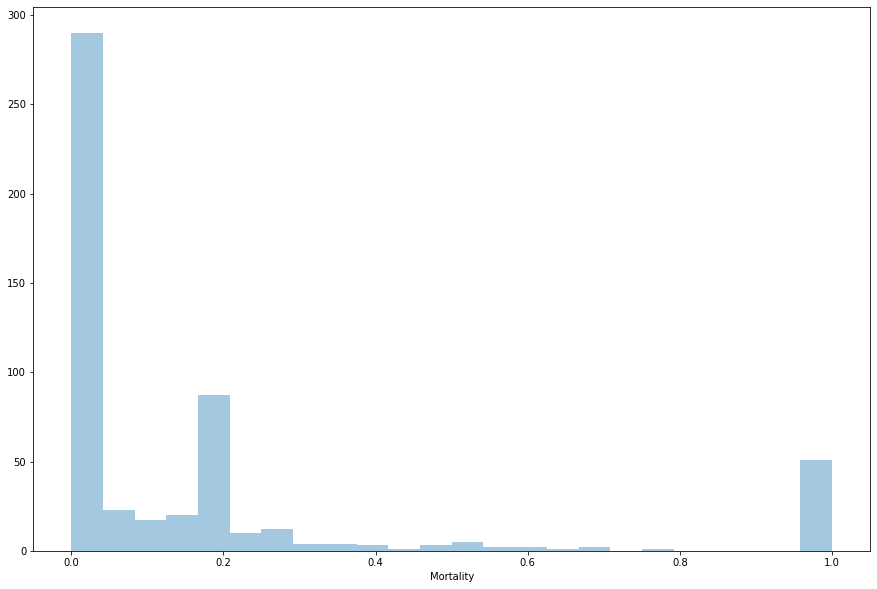

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['Mortality'], kde = False)

#### 3.5	Realizar clustering

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
#from sklearn.preprocessing import RobustScaler

#x = MaxAbsScaler().fit_transform(preprocesado)
minx = MinMaxScaler().fit_transform(preprocesado)
#x = RobustScaler().fit_transform(x)

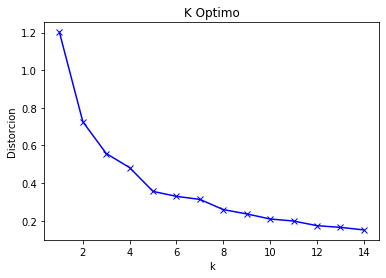

In [41]:
from time import time

X = np.array(list(zip(minx[0], minx[1]))).reshape(len(minx[0]), 2)
distortions = []
K = range(1,15)
  
tiempo = [] 

for k in K:
    start_time = time()
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'seuclidean'), axis=1)) / X.shape[0])
    elapsed_time = time() - start_time
    tiempo.append(elapsed_time)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distorcion')
#plt.ylim(0,0.2)
plt.title('K Optimo')
#plt.savefig('K_optimo', dpi = 300)
plt.show()

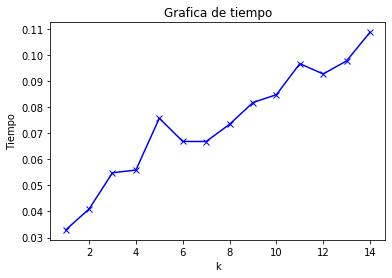

In [42]:
plt.plot(K, tiempo, 'bx-')
plt.xlabel('k')
plt.ylabel('Tiempo')
plt.title('Grafica de tiempo')
#plt.savefig('tiempo', dpi = 300)
plt.show()

In [43]:
from sklearn.decomposition import PCA

num_components=4
pca = PCA(num_components)
principalComponents = pca.fit_transform(minx)

explained_variance=pca.explained_variance_ratio_
explained_variance
print('Varianzas:')
print(np.around(explained_variance, decimals=3))
a = range(num_components)
num_pc= a[::1]

principalDf = pd.DataFrame(data = principalComponents
             , columns = num_pc)

principalDf=round(principalDf, 4)
principalDf.head()

Varianzas:
[0.102 0.101 0.064 0.052]


,0,1,2,3
0,0.0319,0.0564,-0.3588,0.7479
1,1.8818,-0.5221,-0.6421,0.1575
2,-0.4758,0.0490,-0.4225,-0.3059
3,-0.1797,0.0739,-0.2110,0.6390
4,-0.0913,-0.1455,-0.2368,-0.3024


In [44]:
#Datamining: Clustering (método no supervisado de Machine Learning)
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

#Kmeans Clustering 
def doKmeans(X, nclust, init='k-means++',max_iter=100, tol=0.001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(minx, 4)
kmeans = pd.DataFrame(clust_labels)
kmeans.head()

,0
0,1
1,2
2,1
3,1
4,1


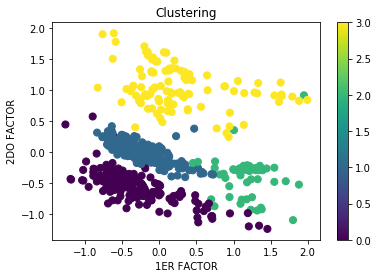

In [45]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDf[0],principalDf[1],
                     c=kmeans[0],s=50)
ax.set_title('Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
plt.colorbar(scatter)
#plt.savefig('Clustering', dpi = 300)

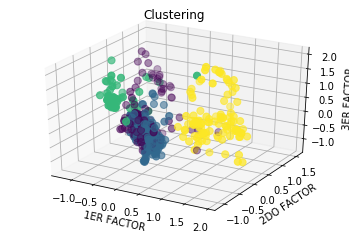

In [46]:
from mpl_toolkits import mplot3d

%matplotlib inline
#%matplotlib notebook

fig = plt.figure()
ax = plt.subplot(1,1,1,projection='3d')

zline = np.linspace(-5, 5, 11)
xline = np.linspace(0, 10, 11)
yline = np.linspace(0, 15, 11)

zdata = principalDf[0]
xdata = principalDf[1]
ydata = principalDf[2]

ax.set_title('Clustering')
ax.set_xlabel('1ER FACTOR')
ax.set_ylabel('2DO FACTOR')
ax.set_zlabel('3ER FACTOR')

ax.scatter(xdata, ydata, zdata
           ,c=kmeans[0]
           ,s=50)
ax.grid()
plt.show()

#### 3.7	Aplicar reducción de dimensionalidad de todo el conjunto

Text(0.5, 0, 'Componentes principales')

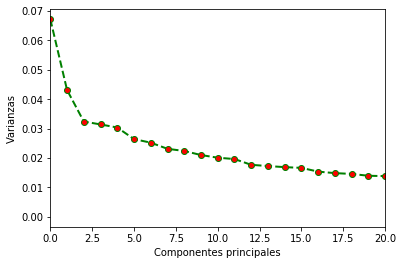

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

pca = PCA()
componentes = pca.fit_transform(preprocesado)
rango = range(160)
num_pc = rango[::1]
mVarianzas = pca.explained_variance_ratio_
#print(mVarianzas)
plt.plot(num_pc, mVarianzas, color='green', linestyle='dashed', linewidth=2, marker='.', markerfacecolor='red', markersize=12)
plt.xlim(0,20)
plt.ylabel('Varianzas')
plt.xlabel('Componentes principales')
#plt.savefig('PCA', dpi = 300)

0


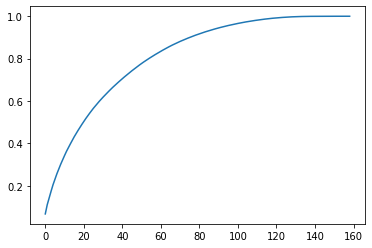

In [48]:
totalVarianza=0
varianzas = []
aux = 0

for i in range(1, 160):
        pca = PCA(i)
        componentes = pca.fit_transform(preprocesado)
        varianza = pca.explained_variance_ratio_
        
        for j in range(0, len(varianza)):
            aux = aux + mVarianzas[j]
        varianzas.append(aux)
        aux=0
print(aux)
plt.plot(varianzas)

#### 3.8	Realizar un Split con 20% en Test.

In [49]:
matX = preprocesado.drop('Mortality',1)
y = preprocesado['Mortality']

In [50]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(matX, y, test_size=0.2, random_state=0)

#### 3.9	Diseñar un modelo de Machine Learning: orientado a clasificación (random forest) o a regresión (regresión multi variable)

In [51]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()

regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, matX.columns, columns=['Coefficient'])
coeff_df.head()

,Coefficient
Overallstudypopulationorsubgroup?,0.004242
Positive/negativecases,0.009899
End-pointvsActive,-0.047013
Survivors,0.052448
Discharged,-0.000839


In [52]:
y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()

,Actual,Predicted
172,1.000000,1.093355
468,0.010000,0.071124
196,0.020000,-0.047970
416,0.169957,0.235488
534,0.100000,0.027493


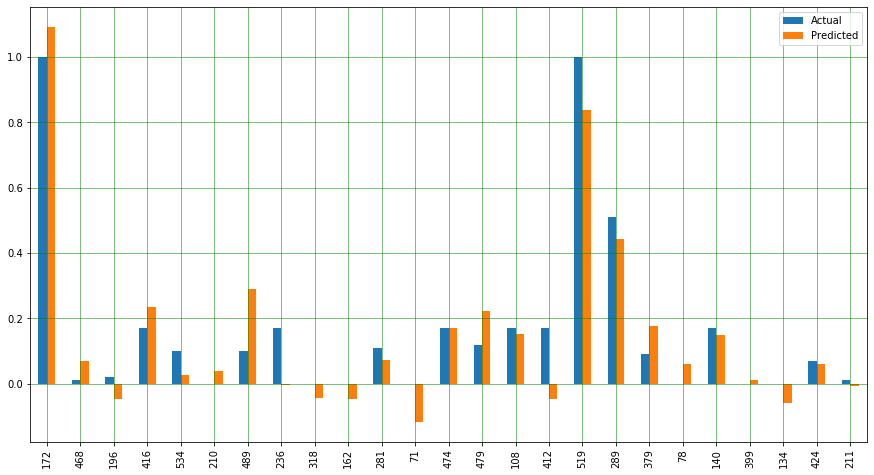

In [53]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('ComparacionPredicciones', dpi = 300)
plt.show()

In [54]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 
#print('Score:', regressor.score(X_train, y_train))

Mean Absolute Error: 0.1200584179542721
Mean Squared Error: 0.03384879802062148
Root Mean Squared Error: 0.18398042836296877


#### 4. Conclusiones
Como conclusion se puede determinar que existen 3 variables muy importantes que influyen la tasa de mortalidad, estas son:
* AnyComorbidity
* Hypertension
* Diabetes

Estas variables se relacion al complejo estado de salud en el que se puede encontrar una persona durante un posible contagio por COVID-19, afectando considerablemente a la tasa de mortalidad.

Se realiza un proceso de clustering, se grafican las distorciones y se usa el metodo del codo para determinar que un K estable de 3, se intenta implementar PCA pero solo se determina, igualmente por medio del metodo del codo, un total de componenetes principales y se grafican las varianzas acumuladas, por razones de los diversos datos que nos presenta la salida no se concluye la reduccion de dimensionalidad. Como ultimo punto se modela usando regresion la cual nos genera predicciones bastante descentes.
